# VWM project: analyse and parse the anime dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math

The dataset was downloaded from this website:
https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews?resource=download

In [2]:
df = pd.read_csv("animesWorking.csv")

In [3]:
df.info()
#df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [4]:
print(df.columns)

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')


In [5]:
genre_column = df.genre
print(genre_column)

0        ['Comedy', 'Sports', 'Drama', 'School', 'Shoun...
1        ['Drama', 'Music', 'Romance', 'School', 'Shoun...
2        ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...
3        ['Action', 'Military', 'Adventure', 'Comedy', ...
4         ['Action', 'Mystery', 'Supernatural', 'Vampire']
                               ...                        
19306           ['Sci-Fi', 'Adventure', 'Comedy', 'Magic']
19307    ['Adventure', 'Fantasy', 'Magic', 'Martial Art...
19308                ['Mystery', 'Horror', 'Supernatural']
19309    ['Action', 'Adventure', 'Comedy', 'Historical'...
19310    ['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']
Name: genre, Length: 19311, dtype: object


In [6]:
tags = set()
for item in genre_column:
    res = set(eval(item))
    tags.update(res)
tags = list(tags)
tags.sort()
print("dataset contains following tags:")
print(tags)
print("# of distinct tags: ", len(tags))

dataset contains following tags:
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']
# of distinct tags:  43


In [7]:
output = pd.DataFrame(index=range(df.shape[0]),columns=range(44))
output.columns = ['Title'] + tags
print(output.columns)
for index, row in df.iterrows():
    output.iloc[index][0] = row['title']
    row_tags = set(eval(row['genre']))
    for t in row_tags:
        output.iloc[index][t] = 1
output = output.fillna(0)
print("0/1 df created")
    

Index(['Title', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical',
       'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military',
       'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance',
       'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai',
       'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports',
       'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')
0/1 df created


In [8]:
attribute_totals = list()
output_normalised = pd.DataFrame(index=range(output.shape[0]),columns=range(output.shape[1]))
output_normalised.columns = output.columns
for index, row in output.iterrows():
    cnt = 0
    for i in range(1,44):
        cnt += int(row[i])
    attribute_totals.append(cnt)
#print(len(attribute_totals))
#print(attribute_totals)
for index, row in output.iterrows():
    output_normalised.iloc[index][0] = row[0]
    if attribute_totals[index] == 0:
        num = 0
    else:
        num = 1/math.sqrt(attribute_totals[index])
    for i in range(1,44):
        if row[i] == 0:
            output_normalised.iloc[index][i] = 0
        else:
            output_normalised.iloc[index][i] = num
print("Normalised")



Normalised


In [9]:
#output_normalised.to_csv('items.csv')


In [10]:
#check = pd.read_csv("items.csv")
#print(check)

In [11]:
nr_items = output.shape[0]
idf = pd.DataFrame(index=range(1),columns=range(output.shape[1]))
idf.columns = ['Title'] + tags
idf['Title'][0] = 'idf'
for name in tags:
    idf[name][0] = math.log((nr_items/output[name].sum()),10)
print(idf)
idf.to_csv('idf.csv')
check = pd.read_csv("idf.csv")
print(check)

  Title    Action Adventure      Cars    Comedy  Dementia    Demons     Drama  \
0   idf  0.661007   0.78846  2.161953  0.475505  1.663591  1.504049  0.808105   

      Ecchi   Fantasy  ... Shounen Ai Slice of Life     Space    Sports  \
0  1.380009  0.745976  ...   2.232726      0.972782  1.534526  1.376784   

  Super Power Supernatural  Thriller   Vampire     Yaoi      Yuri  
0    1.430892     1.050529  2.078979  2.068321  2.39371  2.388178  

[1 rows x 44 columns]
   Unnamed: 0 Title    Action  Adventure      Cars    Comedy  Dementia  \
0           0   idf  0.661007    0.78846  2.161953  0.475505  1.663591   

     Demons     Drama     Ecchi  ...  Shounen Ai  Slice of Life     Space  \
0  1.504049  0.808105  1.380009  ...    2.232726       0.972782  1.534526   

     Sports  Super Power  Supernatural  Thriller   Vampire     Yaoi      Yuri  
0  1.376784     1.430892      1.050529  2.078979  2.068321  2.39371  2.388178  

[1 rows x 45 columns]


In [12]:
import matplotlib
import matplotlib.pyplot as plt

# Matplotlib umožňuje změnit styl na jiný, než defaultní
matplotlib.style.use('ggplot')

# Bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 

### Graphs and tables for report

In [22]:
print(output['Action'].sum())
print (tags)
zero = np.zeros(shape=len(tags))
print(zero)
serie = pd.Series(data=zero, index=tags)
for tag in tags:
    serie[tag] = output[tag].sum()
print(serie)

4215
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Action           4215.0
Adventure        3143.0
Cars              133.0
Comedy           6461.0
Dementia          419.0
Demons            605.0
Drama            3004.0
Ecchi             805.0
Fantasy          3466.0
Game              395.0
Harem             435.0
Hentai           2572.0
Historical       1218.0
Horror            511.0
Josei             115.0
Kids             2549.0
Magic    

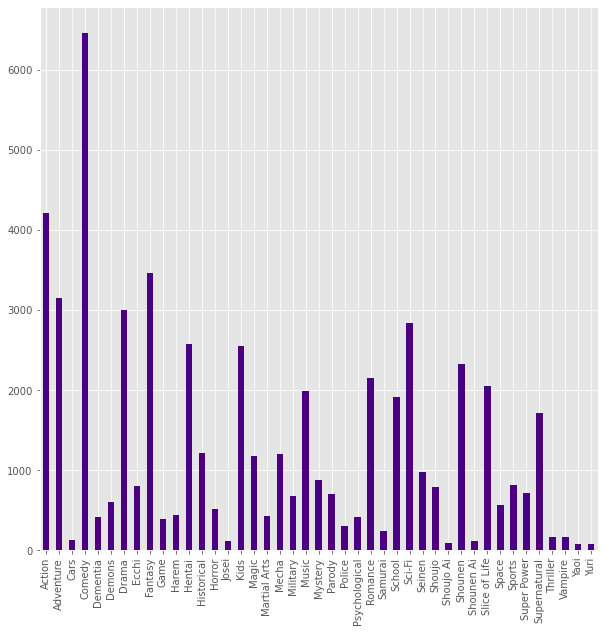

In [56]:
serie.plot.bar(color='indigo', figsize=(10,10))
#plt.xticks(fontsize=5)
#plt.yticks(fontsize=5)
plt.savefig("figure.png")